In [7]:
%%writefile prl_trial.py
from mpi4py import MPI
import numpy as np
import os
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

print('this is rank', rank)
print(os.path)
if not os.path.exists('/home/azhou/IA-Sim-AZhou00/IA_Numeric_Output/tests'):
    os.makedirs('/home/azhou/IA-Sim-AZhou00/IA_Numeric_Output/tests')
filename = os.path.join('/home/azhou/IA-Sim-AZhou00/IA_Numeric_Output/tests', 'test_array%i'%rank)
file = open(filename, "wb")
np.save(file, np.array([rank,rank*2,rank*3]))
file.close


Overwriting prl_trial.py


<module 'posixpath' from '/home/azhou/anaconda3/lib/python3.7/posixpath.py'>


In [12]:
import numpy as np
rs=np.linspace(0, 1, 11)
print(rs)
rs = rs[0:-1]+(rs[0]+rs[1])/2
print(rs)
np.zeros(11)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
for i in range(len(rs)):
    print(rs[i])
print(1/(10-1))

0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0
0.1111111111111111


In [13]:
import numpy as np
batch = 2
step = 5

index_set = np.array(list(range(step)))+((batch-1)*step)
print(index_set)
for i in index_set:
    print(i)

[5 6 7 8 9]
5
6
7
8
9


In [15]:
a=np.array([1,2,3,4])
a.astype(int)

array([1, 2, 3, 4])

In [18]:
sim_step = 2
batch_num = 1
np.array(list(range(sim_step)))+(batch_num*sim_step)
for i in np.array(list(range(sim_step)))+(batch_num*sim_step):
    print(i)

2
3


In [4]:
import numpy as np
a = np.empty((0,10))
b=np.array(list(range(10)))
print(a,b)
a=np.vstack((a,b))
print(a)
a=np.vstack((a,b))
print(a)

[] [0 1 2 3 4 5 6 7 8 9]
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]


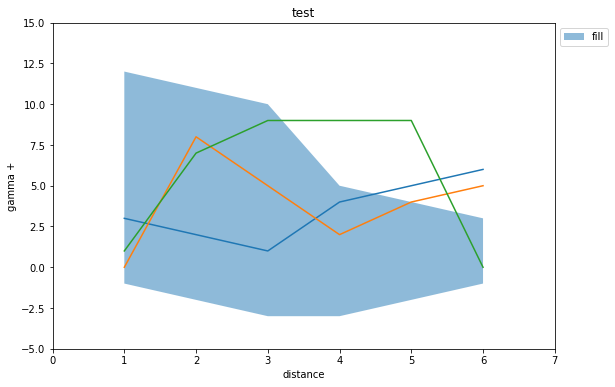

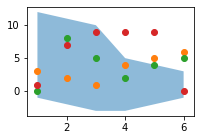

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6]
many_y = [[3,2,1,4,5,6],[0,8,5,2,4,5],[1,7,9,9,9,0]]
ybound = [[12,11,10,5,4,3],[-1,-2,-3,-3,-2,-1]]
fig= plt.figure(figsize=(9,6))
for y in many_y: plt.plot(x,y)
plt.fill_between(x,ybound[0],ybound[1],alpha = 0.5,label='fill')
plt.xlabel('distance')
plt.ylabel('gamma +')
plt.title('test')
plt.xlim(0,7)
plt.ylim(-5,15)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

fig2 = plt.figure(figsize=(3,2))
plt.fill_between(x,ybound[0],ybound[1],alpha = 0.5,label='fill')
for y in many_y: plt.scatter(x,y)
plt.show()

In [75]:
import sys
import os
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#local modules, no name conflicts
from ia_geometry_func import *
from execution_func import *
n=10
a=np.append(np.logspace(- 2 , 0, n),-np.logspace(- 2 , 0, n))
a=np.append(np.logspace(- 2 , 0, n),-np.logspace(- 2 , 0, n))
np.sort(a)
np.logspace(- 2 , 0, 10)

array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

In [50]:
def get_axis_lin(n):
    #this gives a sorted (ascending) linear partition from -1 to 1, in a list of 2n+1 elmts
    #0 always in the list, this prevent computing singular values
    import numpy as np
    return np.linspace(-1,1,n*2+1)
def get_axis_log(n):
    #this gives a sorted (ascending) log partition from -1 to 1, in a list of 2n+1 elmts
    #0 always in the list, this prevent computing singular values
    import numpy as np
    log_axis = np.append(np.logspace(-2,0,n),-1*np.logspace(-2,0,n))
    log_axis = np.append(log_axis,0)
    return np.sort(log_axis)

In [111]:
n=3
#print(get_axis_log(n).size)
print(get_axis_log(n))
print(np.sort(np.append(np.logspace(-2,0,n),0)))
print(get_axis_log(n)[n:2*n+1])

"""#print(get_axis_lin(n).size)
print(get_axis_lin(n))
print(np.linspace(0,1,n+1))
print(get_axis_lin(n)[n:2*n+1])"""

[-1.   -0.1  -0.01  0.    0.01  0.1   1.  ]
[0.   0.01 0.1  1.  ]
[0.   0.01 0.1  1.  ]


'#print(get_axis_lin(n).size)\nprint(get_axis_lin(n))\nprint(np.linspace(0,1,n+1))\nprint(get_axis_lin(n)[n:2*n+1])'

In [63]:
0.0004**3

6.400000000000001e-11

In [61]:
for i in range(4*2):
    x=get_axis_log(4)[i]
    #print(x)
    print((x+get_axis_log(4)[i+1])/2)

-0.6077217345015942
-0.13092967866965805
-0.028207944168063888
-0.005
0.005
0.028207944168063888
0.13092967866965805
0.6077217345015942


In [65]:
[[1,2,3]]

[[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]]

In [67]:
np.sum([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[9,9,9,9,9]],axis=0)

array([12, 15, 18, 21, 24])

In [119]:
n=6
rs_presmooth = get_axis_log(n)[n:2*n+1]
print(rs_presmooth)
np.array([sum(rs_presmooth[i:i+1])/2 for i in range(0,len(rs_presmooth),1)])

[0.         0.01       0.02511886 0.06309573 0.15848932 0.39810717
 1.        ]


array([0.        , 0.005     , 0.01255943, 0.03154787, 0.07924466,
       0.19905359, 0.5       ])

In [135]:
def get_mid_points(ls):
    import numpy as np
    return np.array([(ls[i]+ls[i+1])/2 for i in range(0,len(ls)-1,1)])

In [136]:
ls = get_axis_lin(10)
print(ls.size)
print(get_mid_points(ls).size)
print(ls)
print(get_mid_points(ls))

21
20
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[-0.95 -0.85 -0.75 -0.65 -0.55 -0.45 -0.35 -0.25 -0.15 -0.05  0.05  0.15
  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95]


In [129]:
for i in range(0,5,2):
    print(i)

0
2
4


In [138]:
1 != 1

False

In [140]:
'NA' == "NA"

True

In [148]:
n=4
print(get_axis_log(n).size)
rs = get_axis_log(n)[n:2*n+1]
print(rs.size)
get_mid_points(rs).size

9
5


4

In [144]:
rs.size
rs

array([0.        , 0.01      , 0.04641589, 0.21544347, 1.        ])

In [158]:
import re
filename = 'n 256 -baR _00.2-phiSTD67.50-thetaSTD67.50'
m = re.search('n (\d+)', filename, re.IGNORECASE)
print(m)
#m.group(0)

<re.Match object; span=(0, 5), match='n 256'>


In [178]:
import re
m = re.search('Episode ([+-]?([0-9]*[.])?[0-9]+)', 'series[Episode 37.1]-03th_July_2010-YouTube', re.IGNORECASE)
m.group(1)

'37.1'

In [173]:
n=10
smoothing_len=2
rs_presmooth = get_axis_lin(n)[n:2*n+1]
rs_presmooth = get_mid_points(rs_presmooth)
print(rs_presmooth)
np.array([sum(rs_presmooth[i:i+smoothing_len])/smoothing_len for i in range(0,len(rs_presmooth),smoothing_len)])

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


array([0.1, 0.3, 0.5, 0.7, 0.9])

In [174]:
24%5

4